# Importing dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import mediapipe as mp
import cv2

# Setting up MediaPipe Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
                             )
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2)
                             )

In [5]:
cam = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cam.isOpened():

        # Read feed
        ret, frame = cam.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('Camera Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cam.release()
    cv2.destroyAllWindows()

C:\Users\aksha\anaconda3\envs\imageclassification\lib\site-packages\google\protobuf\symbol_database.py:78: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
cam.release()
cv2.destroyAllWindows()

In [ ]:
mediapipe.solutions.holistic??

In [6]:
draw_landmarks(frame, results)

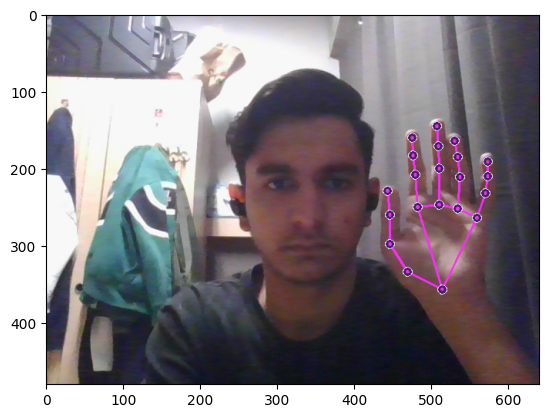

In [7]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extracting Keypoints from images

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
# creating a function that takes the input of the result and creates numpy array with all the landmarks or creating an array with 0's if there are no landmarks in the result
def extract_keypoints(results):
    
    # array for left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

    # array for right hand landmark
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    # returning a concatenated list of all the landmark arrays
    return np.concatenate([lh, rh])

In [11]:
result_test = extract_keypoints(results)

In [13]:
result_test[:10]

array([ 8.04299891e-01,  7.44683862e-01,  3.41684768e-07,  7.33365297e-01,
        6.96038604e-01, -1.98730864e-02,  6.97157860e-01,  6.21420860e-01,
       -2.49373652e-02,  6.97117925e-01])

# Creating folders for data collection

In [14]:
# Path for exported data, numpy arrays
data_path = os.path.join('data/data_1') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou', 'yes', 'no', 'mother', 'father'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [14]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(data_path, action, str(sequence)))
        except:
            pass

# Collecting Data for Training and Testing

In [15]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Camera Feed', image)
                    cv2.waitKey(750)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Camera Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(data_path, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [17]:
cap.release()
cv2.destroyAllWindows()

# Splitting Data

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [17]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'yes': 3,
 'no': 4,
 'mother': 5,
 'father': 6}

In [53]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(data_path, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(data_path, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [54]:
np.array(sequences).shape

(210, 30, 126)

In [55]:
np.array(labels).shape

(210,)

In [56]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [58]:
X_train.shape

(199, 30, 126)

In [59]:
X_test.shape

(11, 30, 126)

# Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

In [27]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [28]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [29]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            48896     
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 203591 (795.28 KB)
Trainable params: 20359

In [89]:
model.load_weights('model/model_12.h5')

In [ ]:
model.fit(X_train, y_train, epochs=20, callbacks=[tb_callback])

In [88]:
model.save('model/model_12.h5')

C:\Users\aksha\anaconda3\envs\imageclassification\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluating the model

In [32]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [90]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 43ms/step


In [91]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [92]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[ 9,  0],
        [ 0,  2]],

       [[ 9,  0],
        [ 0,  2]],

       [[ 9,  0],
        [ 0,  2]],

       [[10,  0],
        [ 0,  1]],

       [[10,  0],
        [ 0,  1]],

       [[ 8,  0],
        [ 0,  3]]], dtype=int64)

In [93]:
accuracy_score(ytrue, yhat)

1.0

In [94]:
res = model.predict(X_test)

1/1 [==============================] - 0s 36ms/step


In [95]:
actions[np.argmax(res[4])]

'father'

In [96]:
actions[np.argmax(y_test[4])]

'father'

# Testing the model in real time

In [40]:
colors = [(245,117,16), (117,245,16), (16,117,245),(245,117,16), (117,245,16), (16,117,245), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [41]:
res[:5]

array([[9.9912781e-01, 6.2403173e-11, 5.0883635e-05, 1.4616962e-06,
        8.4464475e-08, 5.1749400e-09, 8.1971672e-04],
       [9.9496484e-01, 7.5712081e-10, 6.5346903e-05, 2.4174426e-06,
        3.8488508e-07, 3.5229977e-08, 4.9670306e-03],
       [9.9483901e-01, 6.8857230e-06, 3.8855468e-04, 3.0754785e-05,
        4.9763510e-04, 4.1103028e-03, 1.2681904e-04],
       [7.4354205e-07, 1.1612530e-02, 7.4413471e-08, 1.2607385e-06,
        1.5196101e-04, 9.8823339e-01, 5.1444122e-12],
       [1.4659580e-13, 9.9989367e-01, 3.5107917e-10, 2.3983897e-09,
        3.0852448e-08, 1.0634233e-04, 6.6317600e-13]], dtype=float32)

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.975

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.7, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Camera Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [49]:
cap.release()
cv2.destroyAllWindows()